In [1]:
import h3
import geopandas as gpd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
df = gpd.read_file(r'data/Colorado_Well_Depths_and_Elevations.csv')
df['x'] = df.apply(lambda row: float(row.Location.split(',')[1][0:-1]), axis=1)
df['y'] = df.apply(lambda row: float(row.Location.split(',')[0][1:]), axis=1)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['x'], df['y']))
gdf['index_col'] = gdf.index

C:\Users\fac_pisel\Anaconda3\envs\datascience\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [3]:
states = gpd.read_file(r'data/cb_2018_us_state_5m.shp')
borders = states[states.NAME.isin(['Colorado', 'New Mexico', 'Utah', 'Wyoming', 'Arizona', 'Nebraska', 'Kansas', 'Oklahoma'])]

In [4]:
res = 7
def to_hex(row):
    return h3.geo_to_h3(lat=row.y, lng=row.x, resolution=res)

In [5]:
df['h3_loc'] = df.apply(to_hex, axis=1)

In [6]:
df2 = df.groupby('h3_loc').index_col.agg(list).to_frame('idx').reset_index()

In [7]:
df2['count'] = df2['idx'].apply(lambda index_col:len(index_col))

In [8]:
from shapely.geometry import Polygon
def add_geometry(row):
    points = h3.h3_to_geo_boundary(row['h3_loc'], True)
    return Polygon(points)
df2['geometry'] = (df2.apply(add_geometry,axis=1))

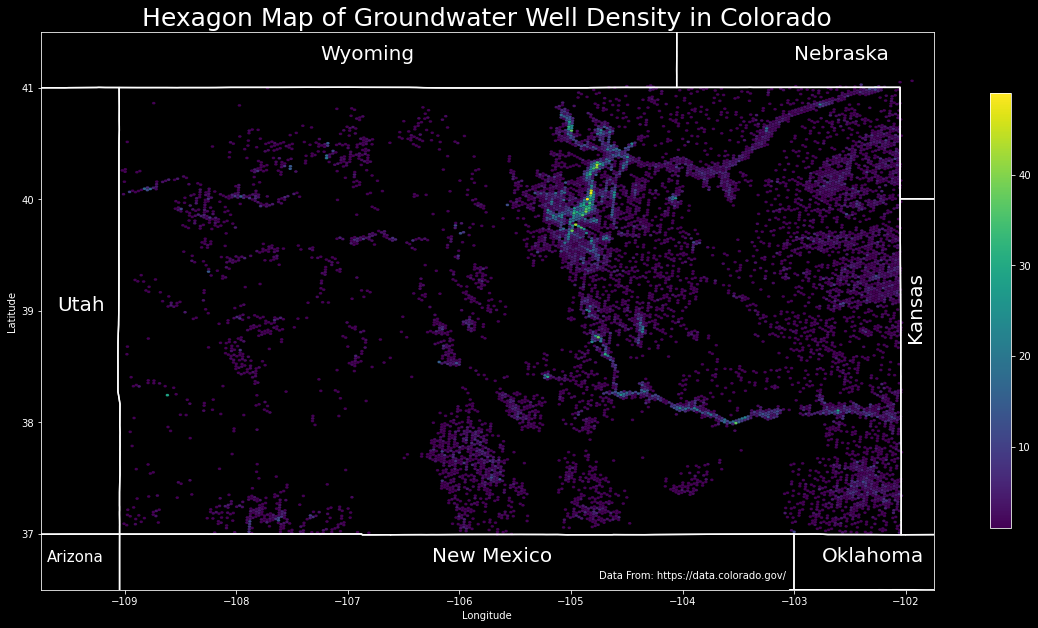

In [9]:
gdf = gpd.GeoDataFrame(df2)
base = borders.geometry.boundary.plot(figsize=(20,20), color='w')
gdf.plot(column='count', ax=base, legend=True, legend_kwds={'shrink': 0.4}, cmap='viridis')
plt.text(-109.6, 39, 'Utah', {'color': 'w', 'fontsize': 20})
plt.text(-106.25, 36.75, 'New Mexico', {'color': 'w', 'fontsize': 20})
plt.text(-107.25, 41.25, 'Wyoming', {'color': 'w', 'fontsize': 20})
plt.text(-103, 41.25, 'Nebraska', {'color': 'w', 'fontsize': 20})
plt.text(-102.75, 36.75, 'Oklahoma', {'color': 'w', 'fontsize': 20})
plt.text(-102, 38.75, 'Kansas', {'color': 'w', 'fontsize': 20}, rotation=90)
plt.text(-109.7, 36.75, 'Arizona', {'color': 'w', 'fontsize': 15})
plt.xlim(-109.75, -101.75)
plt.ylim(36.5,41.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexagon Map of Groundwater Well Density in Colorado', fontsize=25)
plt.text(-104.75, 36.6, r'Data From: https://data.colorado.gov/', {'color': 'w', 'fontsize': 10})
plt.savefig('Day_4.png')